In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns #https://xkcd.com/color/rgb/
from matplotlib.ticker import FormatStrFormatter
from matplotlib import gridspec
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

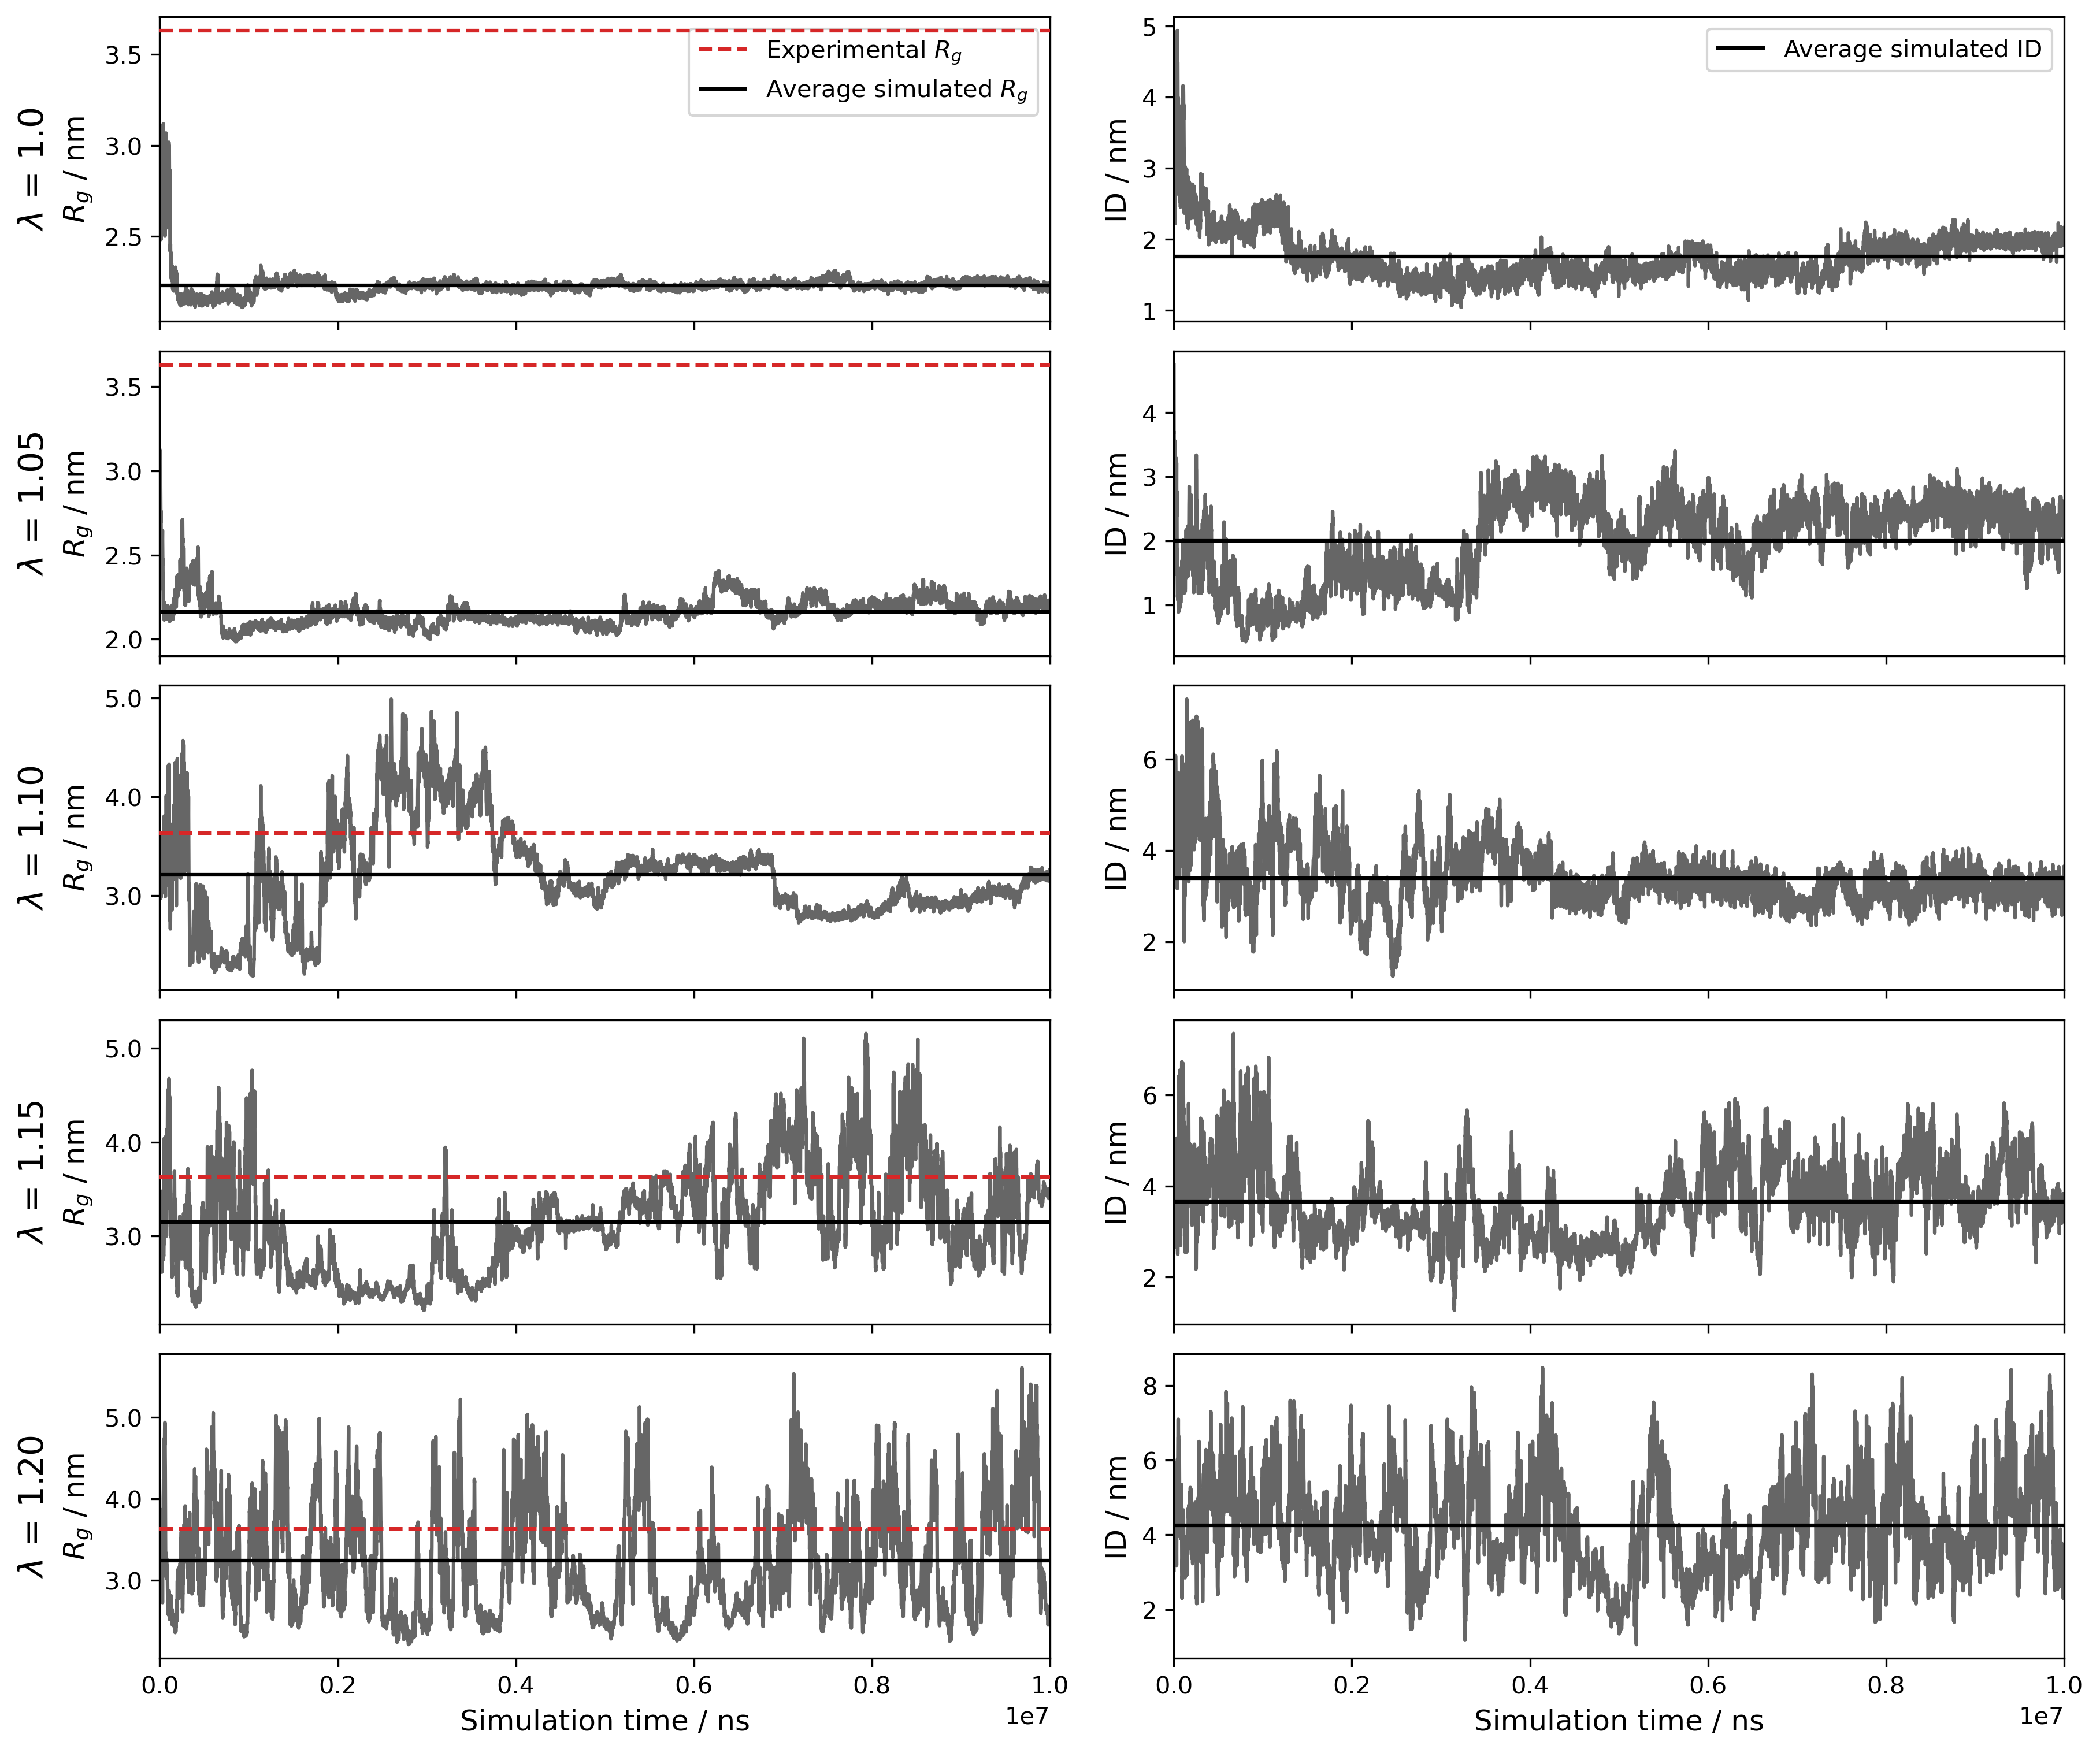

In [81]:
fig, ax = plt.subplots(nrows=5, ncols=2, dpi=300,figsize=(12,10), constrained_layout=True, sharex=True)

LPMO_files = ['1.0', '1.05', '1.10', '1.15','1.20']
rgs = [2.23, 2.16, 3.21, 3.15, 3.24]
dists = [1.76, 2.00, 3.39, 3.65, 4.25]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i,j in enumerate(LPMO_files):
    data = np.loadtxt('LPMO_theta{}_rg.xvg'.format(j), comments=('#', '@'), usecols=(0,1))
    ax[i,0].set_ylabel('$R_g$ / nm')
    ax[i,0].plot(data[:,0], data[:,1], 'k-', alpha=0.6)
    ax[i,0].hlines(3.63,0,1e7,'tab:red', linestyles='dashed', zorder=10, label='Experimental $R_g$')
    ax[i,0].hlines(rgs[i],0,1e7,'black', zorder=10, label='Average simulated $R_g$')
    textstr = '$\lambda$ = {}'.format(j)
    ymin, ymax = ax[i,0].get_ylim()
    ax[i,0].text(-0.16e7, (ymin+ymax)*0.5, textstr, verticalalignment='center', rotation=90, fontsize=BIGGER_SIZE)
    ax[i,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


    data = np.loadtxt('LPMO_theta{}_dist.xvg'.format(j), comments=('#', '@'), usecols=(0,1))
    ax[i,1].set_ylabel('ID / nm')
    ax[i,1].plot(data[:,0], data[:,1], 'k-', alpha=0.6)
    ax[i,1].hlines(dists[i],0,1e7,'black', zorder=10, label='Average simulated ID')

ax[0,0].legend()
ax[0,1].legend()
ax[4,0].set_xlim(0,1e7)
ax[4,0].set_xlabel('Simulation time / ns')
ax[4,1].set_xlabel('Simulation time / ns')
plt.savefig('WT_plots.png', dpi=300)
plt.show()

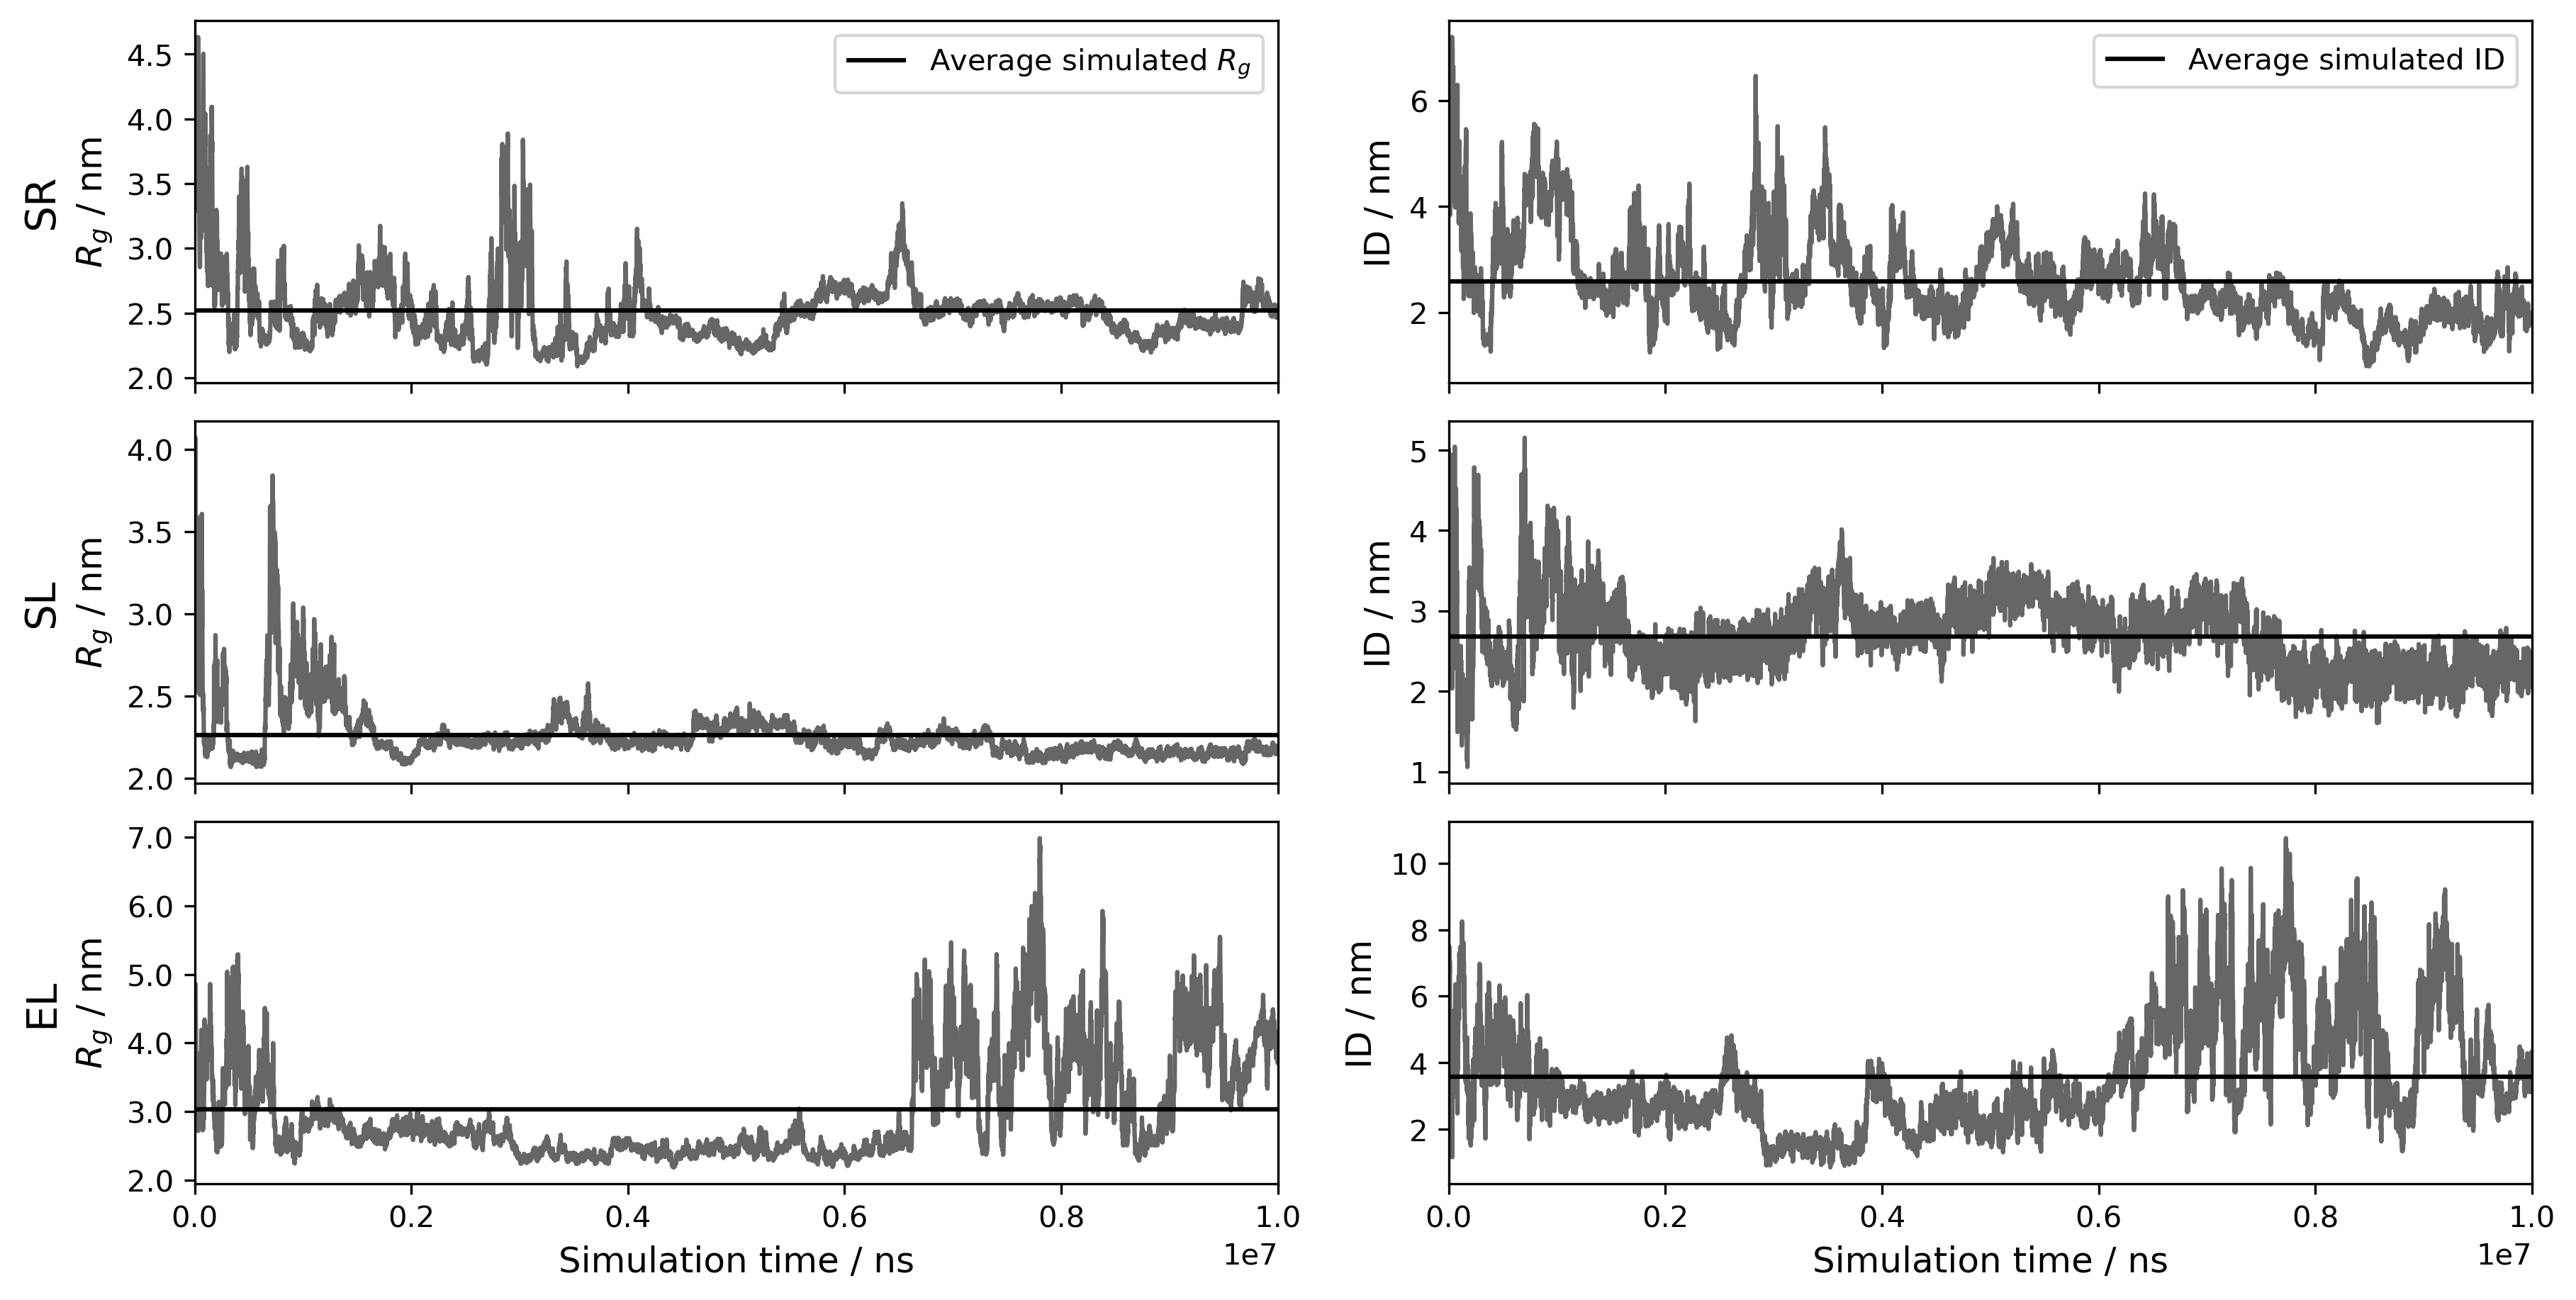

In [79]:
fig, ax = plt.subplots(nrows=3, ncols=2, dpi=300,figsize=(12,6), constrained_layout=True, sharex=True)

LPMO_files = ['polyS', 'shortened', 'extended']
names = ['SR', 'SL', 'EL']
rgs = [2.52, 2.26, 3.03]
dists = [2.58, 2.68, 3.58]

for i,j in enumerate(LPMO_files):
    data = np.loadtxt('{}-1.10_rg.xvg'.format(j), comments=('#', '@'), usecols=(0,1))
    ax[i,0].set_ylabel('$R_g$ / nm')
    ax[i,0].plot(data[:,0], data[:,1], 'k-', alpha=0.6)
    ax[i,0].hlines(rgs[i],0,1e7,'black', zorder=10, label='Average simulated $R_g$')
    textstr = names[i]
    ymin, ymax = ax[i,0].get_ylim()
    ax[i,0].text(-0.16e7, (ymin+ymax)*0.5, textstr, verticalalignment='center', rotation=90, fontsize=BIGGER_SIZE)
    ax[i,0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
  
    data = np.loadtxt('{}-1.10_dist.xvg'.format(j), comments=('#', '@'), usecols=(0,1))
    ax[i,1].set_ylabel('ID / nm')
    ax[i,1].plot(data[:,0], data[:,1], 'k-', alpha=0.6)
    ax[i,1].hlines(dists[i],0,1e7,'black', zorder=10, label='Average simulated ID')

ax[0,0].legend()
ax[0,1].legend()
ax[2,0].set_xlim(0,1e7)
ax[2,0].set_xlabel('Simulation time / ns')
ax[2,1].set_xlabel('Simulation time / ns')
plt.savefig('variants_plots.png', dpi=300)
plt.show()